In [2]:
# ============ importar librerias a usar ============
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

## 1.FUNCIONES DE ACTIVACION

In [3]:
def escalon(x):
  if x > 0:
    return 1
  else:
    return 0


In [4]:
def sigmoide(x):
  return 1/(1+np.exp(-x))

In [5]:
escalon_vec = np.vectorize(escalon)
sigmoide_vec = np.vectorize(sigmoide)

# 2.RNA PERCEPTRON

In [6]:
# creando la neurona
def neurona(entradaX, pesosW1, biasB1, funcion="escalon"):
  # capa 1
  entrada_neta = np.dot(pesosW1,entradaX) + biasB1 # Z = W*X + b
  if funcion == "escalon":
    salida_C1 = escalon_vec(entrada_neta)  # f(Z)
  else:
    salida_C1 = sigmoide_vec(entrada_neta)
  return salida_C1[0] #salida

In [93]:
def ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias):
  for entrada, salida_deseada in zip(entradas,salidas):
    salida_obtenida = neurona(entrada, pesos, bias)
    error =  salida_deseada - salida_obtenida
    if error != 0: # ajustando pesos
      pesos += coef_aprendizaje*error*entrada
      bias += coef_aprendizaje*error*(1) # se pone -1 si el bias de la neurona es -bias para positivizarlos
  return pesos, bias # retorna  pesos y bias parciales


In [94]:
# perceptron fit
def entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas):
  pesos = np.array(2*np.random.rand(1,8)-1) # 8 entradas 1 neurona
  bias = 2*np.random.rand(1)-1
  for iter in range(epocas): # buscar pesos, bias
    pesos, bias = ajuste_perceptron(entradas, salidas, coef_aprendizaje, pesos, bias)
  return pesos, bias #retorna pesos y bias optimo


# 3.LECTURA DE DATOS

In [9]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 4.ANALISIS EXPLORATORIO DE LOS DATOS

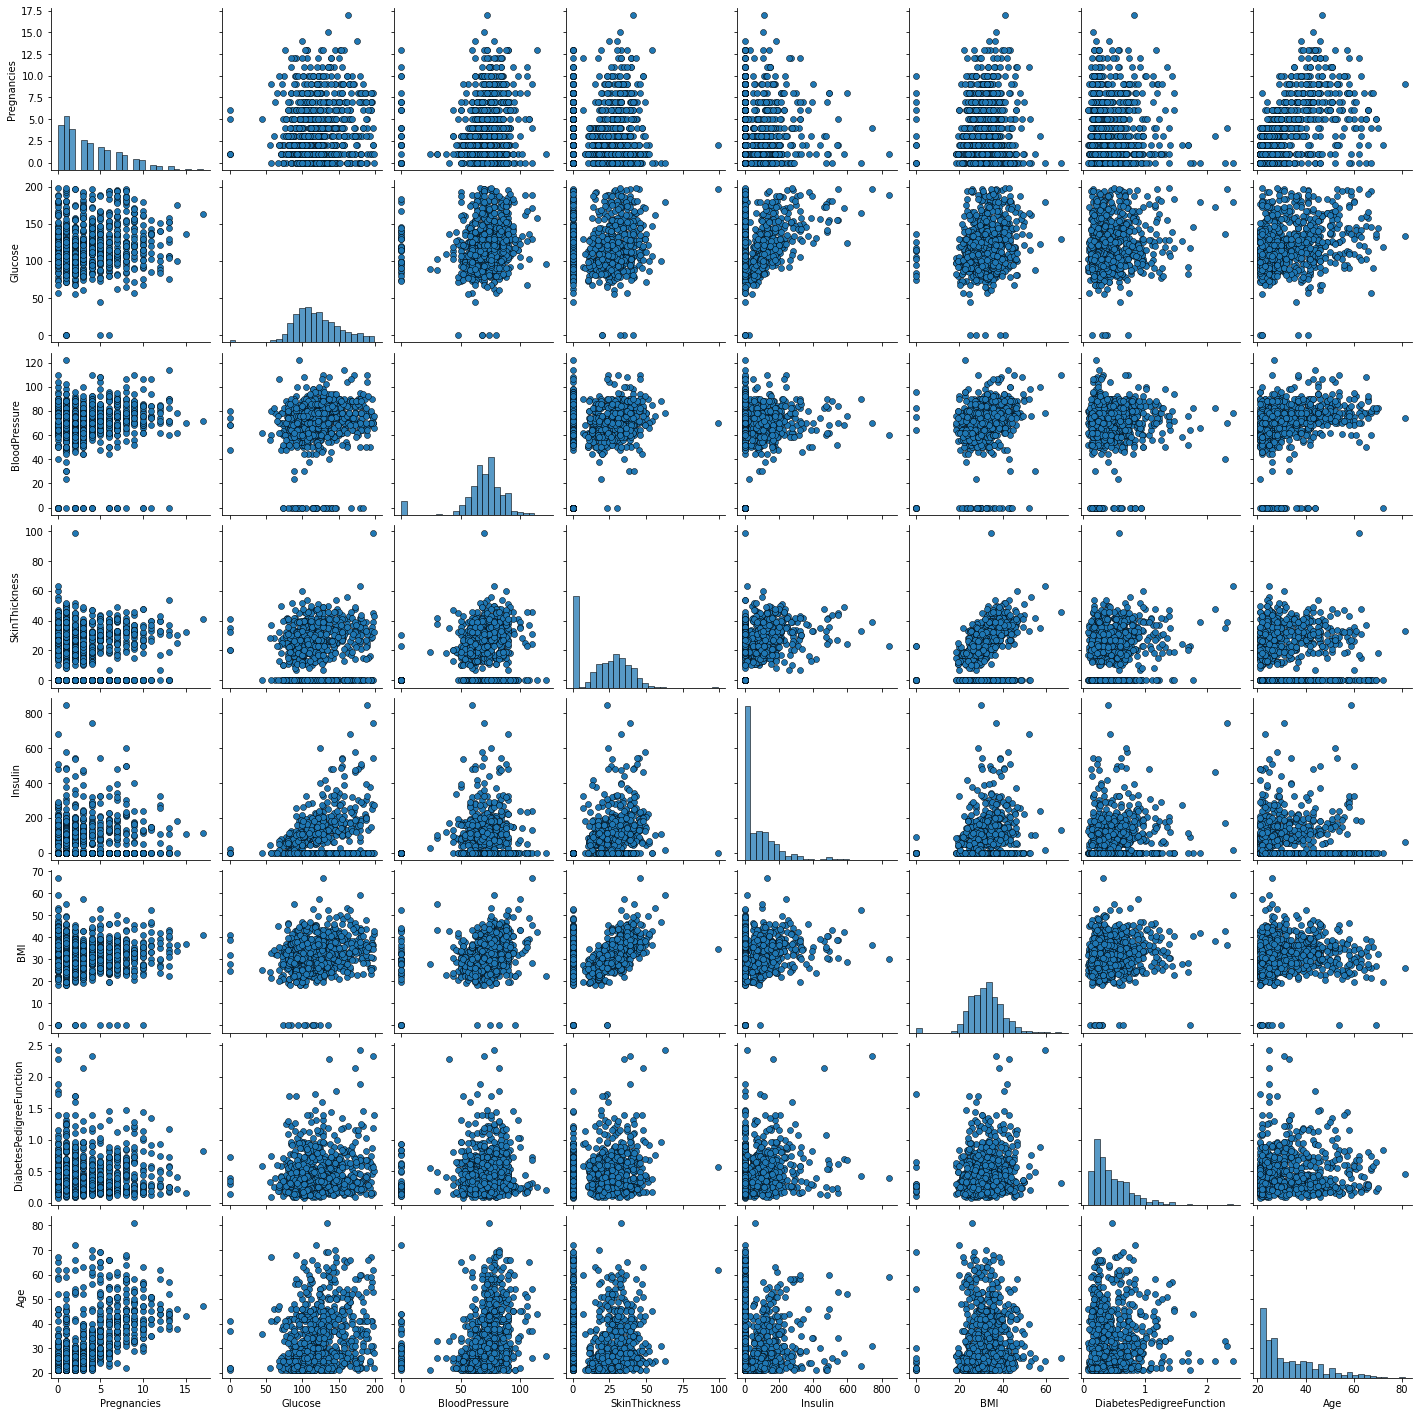

In [12]:
#matriz de scatterplots(gráficos de dispersión)
sns.pairplot(data=df[df.columns[0:8]], diag_kws={'edgecolor':'k', 'bins':25}, plot_kws={'edgecolor':'k'})
plt.show()

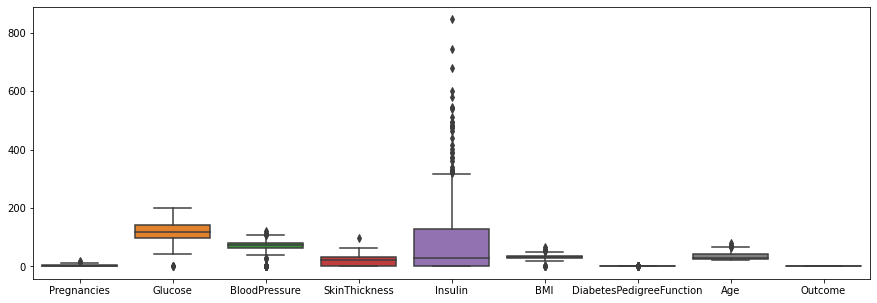

In [13]:
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

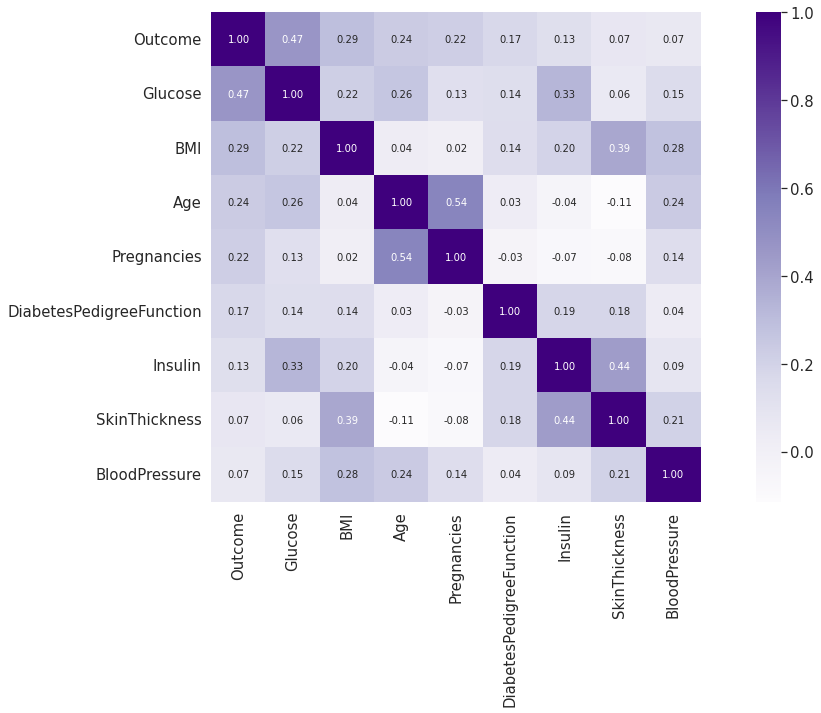

In [16]:
corr = df.corr()
plt.figure(figsize=(20, 9))
columnas = corr.nlargest(12 , 'Outcome')['Outcome'].index
cm = np.corrcoef(df[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Purples")
plt.show()

# PREPROCESAMIENTO DE DATOS

In [11]:
df["Outcome"].unique()

array([1, 0])

In [17]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.1 MB/s 


In [24]:
features = df.columns.to_list()


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [25]:
# TRATAMIENTO DE OUTLIERS
from feature_engine.outliers import Winsorizer
# The values to cap variables are determined using: a Gaussian approximation. the inter-quantile range proximity rule (IQR)
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', # aplicar para ambos lados de la caja y bigotes
                          fold=1.5,
                          variables=features[:-1]) # variables sobre las cuales realizar el tratamiento de outliers
# entrenar modelo 
windsoriser.fit(df)
# transformar en base a los datos entrenados
df = windsoriser.transform(df)

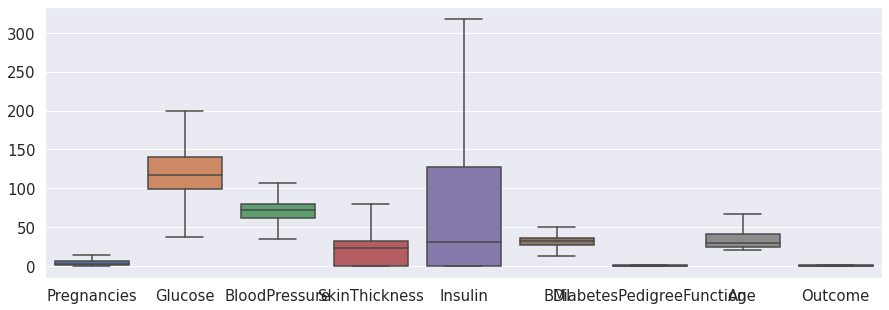

In [26]:
plt.figure(figsize = [15, 5]) 
sns.boxplot(data = df);

# 5.NORMALIZACION DE DATOS

In [27]:
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]

scaler = preprocessing.StandardScaler()
scaler.fit(X)
# =========== TRANSFORMANDO =========== 
X = scaler.transform(X)

# 6.SEPARACION DE DATOS

In [97]:
# =========== SEPARACION DE DATOS =========== 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [98]:
print("Tamaño del conjunto de entrenamiento", X_train.shape)
print("Tamaño del conjunto de prueba", X_test.shape)

Tamaño del conjunto de entrenamiento (614, 8)
Tamaño del conjunto de prueba (154, 8)


# 7.ENTRENAMIENTO

In [99]:
# FIT O TRAIN o entrenamiento
def fit_perceptron(entradas,salidas,coef_aprendizaje,epocas):
  pesos, bias = entrenar_perceptron(entradas, salidas, coef_aprendizaje, epocas)
  return pesos, bias

In [113]:
# FIT
pesos,bias = fit_perceptron(X_train,y_train, 0.2, 50)
print(pesos,bias)

[[ 0.62972629  0.29666686 -0.53920537 -0.3315928   0.29044151  0.72833498
   0.43960647 -0.58764908]] [-0.5640205]


# 8.TEST RNA

In [114]:
def perceptron_predict(entradas):
  y_pred = []
  for entrada in entradas:
    probabilitie_result = neurona(entrada,pesos,bias,"sigmoide_vec")
    if probabilitie_result >= 0.54:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

In [115]:
y_pred=perceptron_predict(X_test)

In [116]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=["Predict-YES", "Predict-NO"], index=["YES","NO"])

,Predict-YES,Predict-NO
YES,87,12
NO,25,30


# 9.Metricas

In [117]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



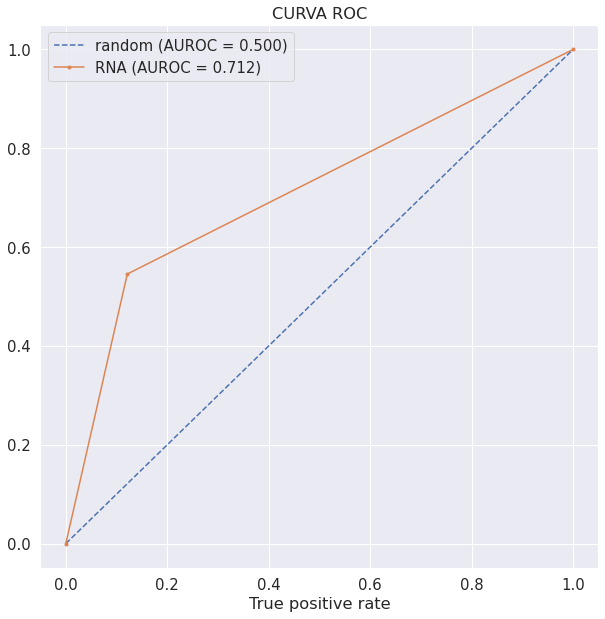

In [118]:
# Curva de ROC
from sklearn.metrics import roc_curve, roc_auc_score
models_probabilities=[]
models_probabilities.append(y_pred)

models_probs = []
models_fpr_tpr = []
for y_pred in models_probabilities:
  # Calculando auc score
  auc = roc_auc_score(y_test, y_pred)
  models_probs.append(auc)
  # Calculando la curva de ROC -> fpr,tpr
  model_fpr, model_tpr, _ = roc_curve(y_test, y_pred)
  models_fpr_tpr.append((model_fpr, model_tpr))

r_probs = [0 for _ in range(len(y_test))] # probabilidad de referencia base
models_probs.append(roc_auc_score(y_test, r_probs))
model_fpr_, model_tpr_, _ = roc_curve(y_test, r_probs)
models_fpr_tpr.append((model_fpr_, model_tpr_))

# graficando CURVA ROC

auc_RNA = models_probs[0]
auc_r = models_probs[1]

RNA_fpr, RNA_tpr = models_fpr_tpr[0]
r_fpr, r_tpr = models_fpr_tpr[1]

plt.figure(figsize=(10,10))

plt.plot(r_fpr, r_tpr,linestyle='--', label="random (AUROC = %0.3f)" % auc_r)
plt.plot(RNA_fpr, RNA_tpr,marker='.', label="RNA (AUROC = %0.3f)" % auc_RNA)

plt.title("CURVA ROC")
plt.xlabel("False positive rate")
plt.xlabel("True positive rate")

plt.legend()
plt.show()

# 10.SALVAR Y RECUPERAR VALORES(peso, bias) DEL MODELO DE RNA ENTRENADO

In [119]:
file_values = open("NRA_Diabetes.txt","w")
for peso in pesos[0]:
  file_values.writelines(f"{peso}\n")
#file_values.writelines(f"{pesos[0]}")
file_values.write(f"{bias[0]}")
file_values.close()

In [120]:
# RECUPERAR VALORES DEL MODELO DE RNA

with open("NRA_Diabetes.txt") as file_object:
  contents = file_object.readlines()
  
# extraer los datos en una lista  
values_saved = []
for value in contents:
  values_saved.append(float(value.rstrip('\n')))

In [121]:
weight_saved = np.array([values_saved[0:-1]])
bias_saved = values_saved[-1]
bias_saved, bias

(-0.5640205031295147, array([-0.5640205]))

# 11.PREDICCION

In [127]:
def predecir(entrada,pesos,bias,funcion):
  result = neurona(entrada,pesos,bias,"sigmoide_vec")
  if result >= 0.54:
    value_predict=1
  else:
    value_predict=0
  return value_predict

In [124]:
def leer_datos():
  features = ['Pregnancies', 'Glucose', 'BloodPressure', 
              'SkinThickness', 'Insulin', 'BMI', 
              'DiabetesPedigreeFunction', 'Age']
  data_input = []
  for feature in features:
    value = float(input(f"insert value of {feature}: "))
    data_input.append(value)
  return data_input

In [142]:
entrada = leer_datos()

insert value of Pregnancies: 7
insert value of Glucose: 145
insert value of BloodPressure: 66
insert value of SkinThickness: 27
insert value of Insulin: 94
insert value of BMI: 28
insert value of DiabetesPedigreeFunction: 0.673
insert value of Age: 35


In [143]:
entrada_df = np.array([entrada]) # convertir a array de numpy y lista de listas
# NORMALIZANDO LOS DATOS DE ENTRADA
entrada_df = scaler.transform(entrada_df);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [145]:
result = predecir(entrada,weight_saved,bias_saved,"sigmoide_vec")
if result == 1:
  print("POSITIVO A DIABETES")
else:
  print("NEGATIVO A DIABETES")

POSITIVO A DIABETES
